In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv("F:\Dataset\Wholesale customers data.csv",usecols=[ 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'])

In [3]:
data.head(4)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788


In [4]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [5]:
data.shape

(440, 6)

In [6]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


##### description
1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

In [7]:
import random

In [8]:
from random import randint, seed


In [9]:
seed(4)
indices=[randint(1,data.shape[0]+1) for i in range(3)]

In [10]:
indices

[121, 156, 53]

In [11]:
samples=pd.DataFrame(data.loc[indices], columns=data.columns)

In [12]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
121,4020,3234,1498,2395,264,255
156,3830,5291,14855,317,6694,3182
53,491,10473,11532,744,5611,224


In [13]:
samples.reset_index(drop=True)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,4020,3234,1498,2395,264,255
1,3830,5291,14855,317,6694,3182
2,491,10473,11532,744,5611,224


In [14]:
data.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [15]:
mean_offset=samples- np.round(data.mean())

In [16]:
median_offset=samples- np.round(data.median())

In [17]:
percentile=100*data.rank(pct=True).loc[indices].round(decimals=2)
print(percentile)

     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
121   29.0  46.0     12.0    63.0              26.0        15.0
156   28.0  64.0     85.0    11.0              86.0        92.0
53     6.0  85.0     78.0    25.0              83.0        12.0


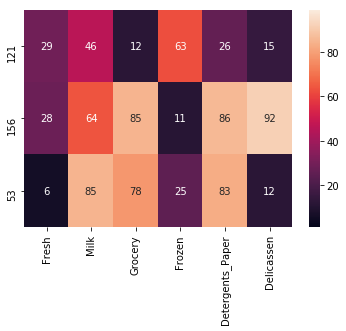

In [18]:
sb.heatmap(percentile, vmin=1, vmax=99, annot=True)

In [19]:
samples.sum(axis=0)

Fresh                8341
Milk                18998
Grocery             27885
Frozen               3456
Detergents_Paper    12569
Delicassen           3661
dtype: int64

In [20]:
samples.apply(lambda x : x/np.sum(x)*100, axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
121,34.459112,27.721584,12.840734,20.529745,2.262986,2.185839
156,11.208991,15.484796,43.475080,0.927742,19.590857,9.312535
53,1.688736,36.020636,39.662941,2.558899,19.298366,0.770421


In [21]:
new_data=data.copy()

In [22]:
Fresh_raw=new_data.Grocery

In [23]:
new_data.drop("Grocery",inplace=True, axis=1)

In [24]:
from sklearn.cross_validation import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
x_train, x_test, y_train, y_test= train_test_split(new_data, Fresh_raw, test_size=0.25, random_state=4)

In [26]:
regressor=DecisionTreeRegressor(criterion="mse", random_state=0)

In [27]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [28]:
y_pred=regressor.predict(x_test)

In [29]:
r2_score( y_test, y_pred)

0.7184131674681453

In [30]:
regressor.score(x_test, y_test)

0.7184131674681453

In [31]:
correltions=data.corr()

In [32]:
correltions

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [33]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000095073000F0>,
      dtype=object)

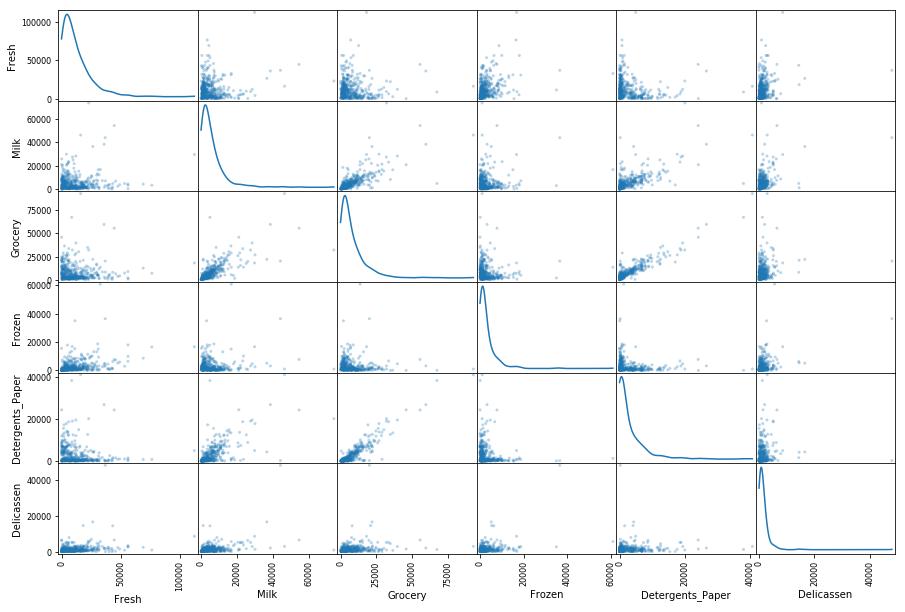

In [34]:
pd.scatter_matrix(data, alpha=0.3, figsize=(15,10), diagonal="kde")

In [35]:
pd.DataFrame.skew(data, axis=0)

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

(array([188., 105.,  70.,  30.,  16.,   9.,   3.,   7.,   2.,   2.,   2.,
          0.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([5.500000e+01, 2.992720e+03, 5.930440e+03, 8.868160e+03,
        1.180588e+04, 1.474360e+04, 1.768132e+04, 2.061904e+04,
        2.355676e+04, 2.649448e+04, 2.943220e+04, 3.236992e+04,
        3.530764e+04, 3.824536e+04, 4.118308e+04, 4.412080e+04,
        4.705852e+04, 4.999624e+04, 5.293396e+04, 5.587168e+04,
        5.880940e+04, 6.174712e+04, 6.468484e+04, 6.762256e+04,
        7.056028e+04, 7.349800e+04]),
 <a list of 25 Patch objects>)

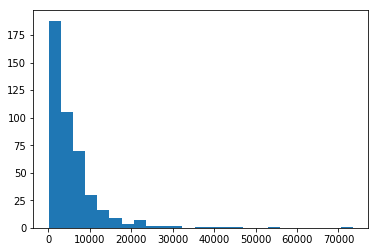

In [36]:
# def hist_plot(column):
#     fig=plt.figure()
#     ax=fig.add_subplot()
#     ax.hist_plot(data[column], bins=25)
#     plt.show()
# columns=["Milk","Grocery", "Deteregents_Paper"]
# for c in columns:
#     hist_plot(c)
plt.hist(data["Milk"], bins=25)

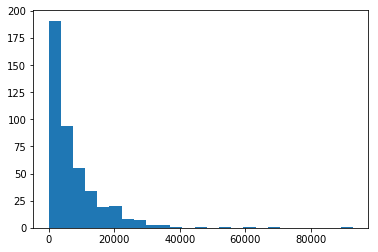

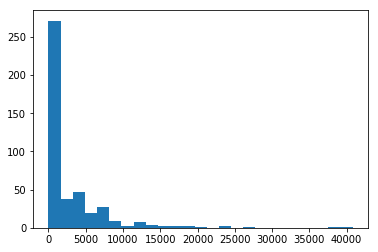

In [37]:
plt.hist(data["Grocery"], bins=25)
plt.show()
plt.hist(data["Detergents_Paper"], bins=25)
plt.show()

In [39]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
121,4020,3234,1498,2395,264,255
156,3830,5291,14855,317,6694,3182
53,491,10473,11532,744,5611,224


In [41]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000950AFA4AC8>,
      dtype=object)

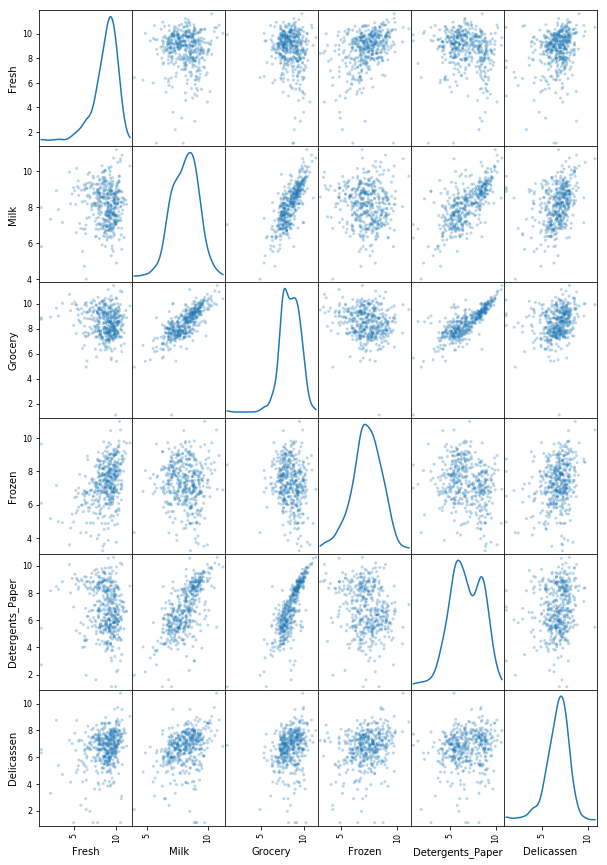

In [49]:
log_data=data.apply(np.log)
log_samples=samples.apply(np.log)
pd.scatter_matrix(log_data, alpha=0.3, figsize=(10,15), diagonal="kde")
    

In [55]:
log_samples
log_samples.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,-0.917082,-0.428605,0.109912,-0.475215,0.519923
Milk,-0.917082,1.000000,0.753287,-0.497082,0.786614,-0.136237
Grocery,-0.428605,0.753287,1.000000,-0.945127,0.998635,0.548934
Frozen,0.109912,-0.497082,-0.945127,1.000000,-0.926771,-0.791892
Detergents_Paper,-0.475215,0.786614,0.998635,-0.926771,1.000000,0.504522
Delicassen,0.519923,-0.136237,0.548934,-0.791892,0.504522,1.000000


In [56]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [85]:
outlier={}
for features in log_data.columns:
    Q1=np.percentile(log_data[features],25)
    Q3=np.percentile(log_data[features],75)
step=1.5*(Q3-Q1)
print ("Data points considered outliers for the feature '{}':".format(features))
outlier= log_data[((log_data[features] <= Q1 - step) | (log_data[features] >= Q3 + step))].index.tolist()
outlier

    

Data points considered outliers for the feature 'Delicassen':


[66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

In [102]:
# outlier_more_than_feature=[]
# for i in range(len(log_data.columns)-1):
#     a=outlier[log_data.loc[i]]
#     for j in range(i+1, len(log_data.columns)):
#         b=outlier[log_data.loc[j]]
#         outlier_more_than_feature.extend(filter(lambda x: x in a, b))
# outlier_more_than_feature= list(outlier_more_than_feature)

In [122]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(log_data)
pca_samples=pca.transform(log_samples)
pca_samples
pca_data=pca.transform(log_data)
pca_data


array([[-1.75098532e+00, -7.05152286e-02],
       [-1.80036534e+00, -8.69753573e-01],
       [-1.89373597e+00, -1.67662072e+00],
       [ 1.12731297e+00, -1.45798229e+00],
       [-7.96711467e-01, -2.46086569e+00],
       [-1.08382370e+00, -3.92942430e-01],
       [-1.13261002e+00,  2.01601862e-01],
       [-1.58247377e+00, -9.68196420e-01],
       [-8.71825215e-01,  5.96758895e-01],
       [-2.88888315e+00, -7.41102520e-01],
       [-2.11616786e+00, -7.48845431e-01],
       [ 9.91451442e-01, -6.27014670e-02],
       [-2.23259521e+00, -1.32782770e+00],
       [-1.90404777e+00, -1.33385723e+00],
       [-2.33337847e+00, -9.83570924e-01],
       [ 4.17284069e-01,  8.14298928e-01],
       [-2.80513630e+00,  1.95322632e+00],
       [ 2.52569663e-01, -6.04494310e-01],
       [-1.40226890e+00, -1.86546557e+00],
       [-1.01598970e+00,  4.15101430e-01],
       [-8.36133270e-01, -1.14744897e+00],
       [ 1.72471835e+00,  1.47340654e-01],
       [-1.54938706e-01, -2.82992022e+00],
       [-2.

In [123]:
pca.components_

array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874]])

In [125]:
pca.explained_variance_

array([4.83781898, 3.02459061])

In [127]:
pca.explained_variance_ratio_

array([0.44237417, 0.27657107])

In [129]:
sum(pca.explained_variance_ratio_[0:2])


0.7189452317370726

In [130]:
sum(pca.explained_variance_ratio_[0:4])

0.7189452317370726

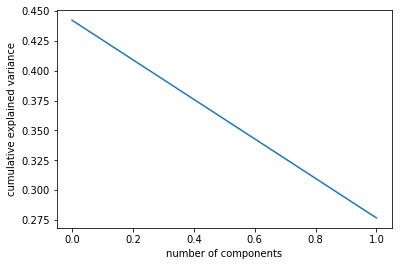

In [136]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [137]:

reduced_Data=pd.DataFrame(pca_data, columns=["PC1","PC2"])

In [138]:
reduced_Data.head(4)

,PC1,PC2
0,-1.750985,-0.070515
1,-1.800365,-0.869754
2,-1.893736,-1.676621
3,1.127313,-1.457982


In [140]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2, random_state=4)

In [142]:
kmeans.fit(reduced_Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=4, tol=0.0001, verbose=0)

In [148]:
pred=kmeans.predict(reduced_Data)
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [149]:
centres=kmeans.cluster_centers_
centres

array([[ 1.50435106, -0.16415532],
       [-2.21426954,  0.24162188]])

In [152]:
sample_pred=kmeans.predict(pca_samples)
sample_pred

array([0, 1, 1])

In [153]:
from sklearn.metrics import silhouette_score

In [156]:
for k in range(2,7):
    best_kmeans=KMeans(n_clusters=k)
    best_kmeans.fit(reduced_Data)
    pred=best_kmeans.predict(reduced_Data)
    score=silhouette_score(reduced_Data,pred)
    print(score)
    

0.41916608320292303
0.3936785258078331
0.330208290906621
0.35006859016853853
0.3580190481565273


In [160]:
from sklearn.mixture import GMM
g=GMM(n_components=2)
g.fit(reduced_Data)
g.predict(reduced_Data)
centre=g.means_
centre

C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py

array([[-1.01432429,  0.45311006],
       [ 0.71464435, -0.31923966]])

In [162]:
centre==centres

array([[False, False],
       [False, False]])

In [164]:
print(centre)
print(centres)

[[-1.01432429  0.45311006]
 [ 0.71464435 -0.31923966]]
[[ 1.50435106 -0.16415532]
 [-2.21426954  0.24162188]]


In [167]:
log_centres=pca.inverse_transform(centres)
log_centres

array([[9.10434412, 7.55429494, 7.76903529, 7.64049609, 5.67133583,
        6.52400085],
       [8.18034392, 8.95525525, 9.43048884, 6.8022705 , 8.42661631,
        6.87286697]])

In [169]:
true_centre=np.exp(log_centres)
true_centre

array([[ 8994.28020409,  1908.9238672 ,  2366.18750112,  2080.77580909,
          290.42222959,   681.29871226],
       [ 3570.08228363,  7748.50539402, 12462.61747658,   899.88817052,
         4567.02051715,   965.71327249]])

In [171]:
segments=[i for i in range(len(centres))]
segments

[0, 1]

In [173]:
true_centre=pd.DataFrame(np.round(true_centre), columns=data.columns, index=segments)
true_centre

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,8994.0,1909.0,2366.0,2081.0,290.0,681.0
1,3570.0,7749.0,12463.0,900.0,4567.0,966.0


In [178]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [180]:
true_centre-data.mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-3006.297727,-3887.265909,-5585.277273,-990.931818,-2591.493182,-843.870455
1,-8430.297727,1952.734091,4511.722727,-2171.931818,1685.506818,-558.870455


In [182]:
true_centre-data.median()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,490.0,-1718.0,-2389.5,555.0,-526.5,-284.5
1,-4934.0,4122.0,7707.5,-626.0,3750.5,0.5
